# 导包

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2)

plt.rcParams['font.sans-serif']=['SimHei'] # 正常显示中文标签
plt.rcParams['axes.unicode_minus']=False # 正常显示负号

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 读取数据

In [2]:
train_df=pd.read_csv('/content/drive/MyDrive/data/Emotion_Recognition/nCoV_100k_train.labled.csv')
test_df=pd.read_csv('/content/drive/MyDrive/data/Emotion_Recognition/nCov_10k_test.csv')

In [3]:
train_df.head()

,微博id,微博发布时间,发布人账号,微博中文内容,微博图片,微博视频,情感倾向
0,4456072029125500,01月01日 23:50,存曦1988,写在年末冬初孩子流感的第五天，我们仍然没有忘记热情拥抱这2020年的第一天。带着一丝迷信，早...,['https://ww2.sinaimg.cn/orj360/005VnA1zly1gah...,[],0
1,4456074167480980,01月01日 23:58,LunaKrys,开年大模型…累到以为自己发烧了腰疼膝盖疼腿疼胳膊疼脖子疼#Luna的Krystallife#?,[],[],-1
2,4456054253264520,01月01日 22:39,小王爷学辩论o_O,邱晨这就是我爹，爹，发烧快好，毕竟美好的假期拿来养病不太好，假期还是要好好享受快乐，爹，新...,['https://ww2.sinaimg.cn/thumb150/006ymYXKgy1g...,[],1
3,4456061509126470,01月01日 23:08,芩鎟,新年的第一天感冒又发烧的也太衰了但是我要想着明天一定会好的?,['https://ww2.sinaimg.cn/orj360/005FL9LZgy1gah...,[],1
4,4455979322528190,01月01日 17:42,changlwj,问：我们意念里有坏的想法了，天神就会给记下来，那如果有好的想法也会被记下来吗？答：那当然了。...,[],[],1


In [4]:
train_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   微博id    100000 non-null  int64 
 1   微博发布时间  100000 non-null  object
 2   发布人账号   100000 non-null  object
 3   微博中文内容  99646 non-null   object
 4   微博图片    100000 non-null  object
 5   微博视频    100000 non-null  object
 6   情感倾向    99919 non-null   object
dtypes: int64(1), object(6)
memory usage: 74.6 MB


In [5]:
train_df['情感倾向'].value_counts()

0     57619
1     25392
-1    16902
4         1
9         1
10        1
-         1
-2        1
·         1
Name: 情感倾向, dtype: int64

# 数据清洗

In [6]:
train_df=train_df[train_df['情感倾向'].isin(['-1','0','1'])]
train_df.info(memory_usage='deep')
train_df.to_csv('/content/drive/MyDrive/data/Emotion_Recognition/nCoV_100k_train.labled.csv')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99913 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   微博id    99913 non-null  int64 
 1   微博发布时间  99913 non-null  object
 2   发布人账号   99913 non-null  object
 3   微博中文内容  99560 non-null  object
 4   微博图片    99913 non-null  object
 5   微博视频    99913 non-null  object
 6   情感倾向    99913 non-null  object
dtypes: int64(1), object(6)
memory usage: 75.3 MB


# 标签分布

In [7]:
train_df['情感倾向'].value_counts() / train_df['情感倾向'].count()

0     0.576692
1     0.254141
-1    0.169167
Name: 情感倾向, dtype: float64

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


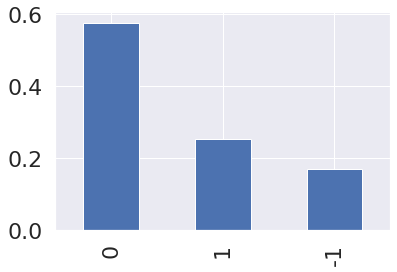

In [8]:
(train_df['情感倾向'].value_counts() / train_df['情感倾向'].count()).plot.bar()

# 文本数据

In [9]:
train_df['char_length']=train_df['微博中文内容'].astype(str).apply(len)

In [10]:
np.percentile(train_df['char_length'].tolist(), 75)

140.0

In [11]:
np.percentile(train_df['char_length'].tolist(), 99)

162.0

In [12]:
# 分词
! pip install pkuseg
import pkuseg
seg=pkuseg.pkuseg()
train_df['word_length']=train_df['微博中文内容'].astype(str).apply(lambda x: len(seg.cut(x)))
np.percentile(train_df['word_length'].tolist(), 99)

     |████████████████████████████████| 50.2MB 158kB/s 


100.0

# 图片分析

In [13]:
train_df['pic_length']=train_df['微博图片'].astype(str).apply(lambda x: len(eval(x)))
train_df['pic_length'].value_counts()

1    48888
0    32080
2     4577
3     4344
9     4171
4     2487
6     2001
5      795
7      300
8      270
Name: pic_length, dtype: int64

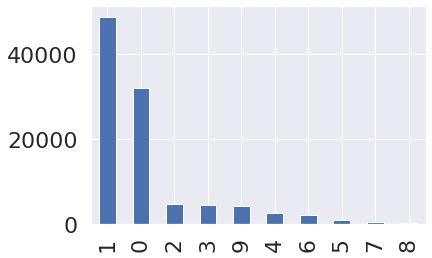

In [14]:
train_df['pic_length'].value_counts().plot.bar()

# 视频分析

In [15]:
train_df['video_length']=train_df['微博视频'].astype(str).apply(lambda x: len(eval(x)))
train_df['video_length'].value_counts()

0    77496
1    22417
Name: video_length, dtype: int64

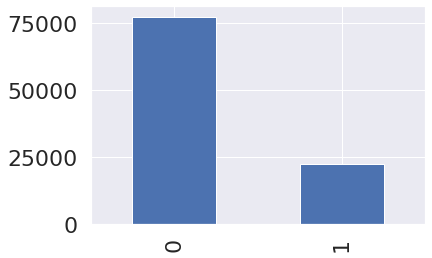

In [16]:
train_df['video_length'].value_counts().plot.bar()